In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/MachineLearning/praktikum07/"

In [ ]:
import pandas as pd

path = '/content/gdrive/MyDrive/MachineLearning/praktikum07'
df = pd.read_csv(path + '/data/apples_and_oranges.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [ ]:
#Cek Nilai Unik pada Kolom Class
print("\n=== Nilai Unik pada Kolom Class ===")
print(df["Class"].unique())
print("\nJumlah Data per Kelas:")
print(df["Class"].value_counts())


=== Nilai Unik pada Kolom Class ===
['orange' 'apple']

Jumlah Data per Kelas:
Class
orange    20
apple     20
Name: count, dtype: int64


In [ ]:
# Pisahkan Fitur dan Label
X = df[['Weight', 'Size']]
y = df['Class']

In [ ]:
# Encode label teks ke angka (apple=0, orange=1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split Data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Bangun Model SVM
model = SVC(kernel='linear')  # kernel linear sesuai modul
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Prediksi Data Uji
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print("\n=== Akurasi Model ===")
print(f"Akurasi: {accuracy * 100:.2f}%")


=== Akurasi Model ===
Akurasi: 100.00%


In [ ]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


=== Classification Report ===
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



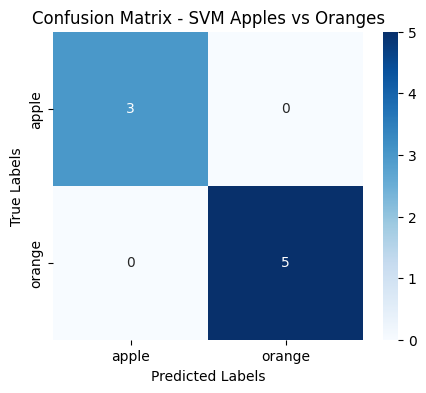

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM Apples vs Oranges")
plt.show()

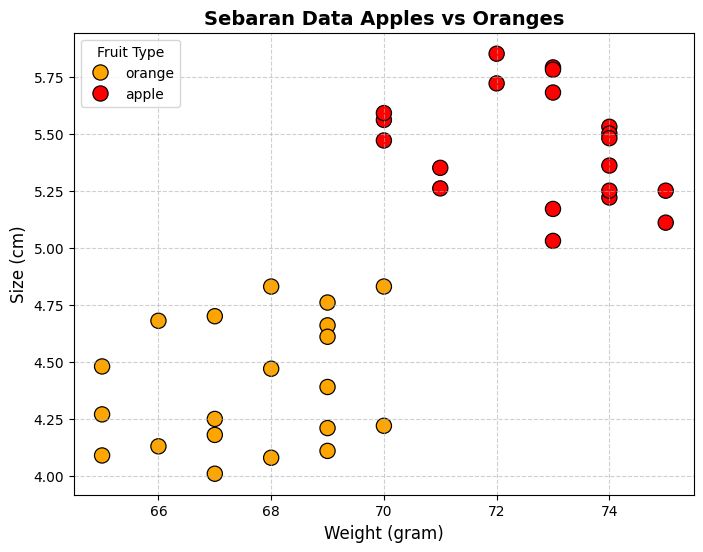

In [ ]:
# Visualisasi Sebaran Data Apples vs Oranges
plt.figure(figsize=(8,6))

# Scatter plot dengan warna berbeda untuk setiap kelas
sns.scatterplot(
    x='Weight',
    y='Size',
    hue='Class',          # Warna otomatis berdasarkan label
    palette={'apple': 'red', 'orange': 'orange'},  # Warna manual untuk tiap kelas
    data=df,
    s=120,                # Ukuran titik
    edgecolor='black'     # Tambahkan garis tepi agar lebih jelas
)

plt.title("Sebaran Data Apples vs Oranges", fontsize=14, fontweight='bold')
plt.xlabel("Weight (gram)", fontsize=12)
plt.ylabel("Size (cm)", fontsize=12)
plt.legend(title="Fruit Type", loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
